In [1]:
from astropy.io.votable import parse_single_table
import requests
from io import BytesIO
from astropy.time import Time
from specutils import SpectrumList
import re
import matplotlib.pyplot as plt


Code sourced from https://docs.datacentral.org.au/help-center/virtual-observatory-examples/ssa-accessing-original-spectra/

Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   (4096,)   float64   


        Use Spectrum instead. [warnings]


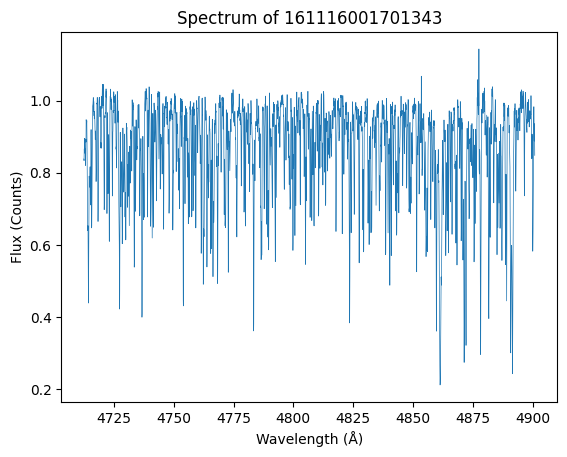

In [40]:
from astropy.io import fits
from specutils import Spectrum1D
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import requests
from io import BytesIO

# === Download and open FITS ===
url = "https://datacentral.org.au/vo/slink/links?ID=161116001701343&DR=galah_dr3&IDX=0&FILT=B&RESPONSEFORMAT=fits"  # replace with actual URL
spec = requests.get(url).content
hdul = fits.open(BytesIO(spec))

hdul.info()
header = hdul[0].header
flux = hdul[0].data

# === Build wavelength axis from WCS keywords if available ===
crval1 = header.get('CRVAL1')   # starting wavelength
cdelt1 = header.get('CDELT1')   # dispersion per pixel
crpix1 = header.get('CRPIX1', 1)  # reference pixel (default to 1)

if crval1 is None or cdelt1 is None:
    raise ValueError("Missing CRVAL1 or CDELT1 in FITS header")

npix = len(flux)
wavelength = (crval1 + (np.arange(npix) + 1 - crpix1) * cdelt1) * u.AA

# === Create Spectrum1D object ===
spectrum = Spectrum1D(spectral_axis=wavelength, flux=flux * u.count)

# === Plot ===
plt.plot(spectrum.spectral_axis, spectrum.flux, linewidth=0.5)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (Counts)")
plt.title("Spectrum of 161116001701343")
plt.show()


In [42]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u


# Use PRIMARY HDU for wavelength info
hdr = hdul[0].header
crval1 = hdr.get("CRVAL1")
cdelt1 = hdr.get("CDELT1")
crpix1 = hdr.get("CRPIX1", 1)  # default to 1 if not present

# Get flux from the normalized spectrum (2nd extension)
flux = hdul["normalized"].data

# Build wavelength axis
npix = len(flux)
wavelength = (crval1 + (np.arange(npix) + 1 - crpix1) * cdelt1) * u.AA

# Plot
plt.plot(wavelength, flux)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Flux")
plt.title("GALAH Normalized Spectrum")
plt.show()


KeyError: "Extension 'normalized' not found."

In [43]:
hdul.info()


Filename: <class '_io.BytesIO'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   (4096,)   float64   


In [37]:
# change the sobject_id to a valid value from the GALAH catalogue, and the x in FILT=x to B, G, R, I (respectively Blue/CCD1, Green/CCD2, Red/CCD3, Infrared/CCD4) for the particular camera of interest.


u = 'https://datacentral.org.au/vo/slink/links?ID=161116001701343&DR=galah_dr3&IDX=0&FILT=B&RESPONSEFORMAT=fits'
target = '161116001701343'

print (target,u)
ofname = "%s.fits" % target
print ("Downloading ",ofname)
spec = requests.get(u).content
#write out the spectrum to a file
fptr = open(ofname,"wb")
fptr.write(spec)
fptr.close()
#Load in the spectra using specutils and the 6dFGS-combined loader
slist = SpectrumList.read(BytesIO(spec),format='simple')
nspec = len(slist)
for idx in range(0,nspec):
    hdr = slist[idx].meta['header']
    band = re.sub('SPECTRUM ','',hdr['EXTNAME'])
    wave = slist[idx].wavelength
    flux = slist[idx].flux
    plt.plot(wave,flux,linewidth=LWIDTH)
    titre = "%s: %s spectrum" % (target,band)
    plt.title(titre)
    plt.xlabel("Wavelength ($\mathrm{\AA}$)")
    plt.ylabel("Counts")
    plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1969386/2155411071.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Wavelength ($\mathrm{\AA}$)")


161116001701343 https://datacentral.org.au/vo/slink/links?ID=161116001701343&DR=galah_dr3&IDX=0&FILT=B&RESPONSEFORMAT=fits


/tmp/ipykernel_1969386/2155411071.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Wavelength ($\mathrm{\AA}$)")


IORegistryError: No reader defined for format 'simple' and class 'SpectrumList'.

The available formats are:

            Format            Read Write Auto-identify
----------------------------- ---- ----- -------------
                    2SLAQ-LRG  Yes    No           Yes
                       2dFGRS  Yes    No           Yes
               6dFGS-combined  Yes    No           Yes
                  6dFGS-split  Yes    No           Yes
                6dFGS-tabular  Yes    No           Yes
                APOGEE apStar  Yes    No           Yes
               APOGEE apVisit  Yes    No           Yes
            APOGEE aspcapStar  Yes    No           Yes
                        ASCII  Yes    No           Yes
                   DESI coadd  Yes    No           Yes
                 DESI spectra  Yes    No           Yes
         Data Central AAOmega  Yes    No           Yes
Data Central Multiline-Single  Yes    No           Yes
    Data Central Single-Split  Yes    No           Yes
                         ECSV  Yes    No           Yes
                        GALAH  Yes    No           Yes
                         GAMA  Yes    No           Yes
                     GAMA-2QZ  Yes    No           Yes
               GAMA-2SLAQ-QSO  Yes    No           Yes
                  GAMA-2dFGRS  Yes    No           Yes
                      GAMA-LT  Yes    No           Yes
                     GAMA-MGC  Yes    No           Yes
                 GAMA-WiggleZ  Yes    No           Yes
                      HST/COS  Yes    No           Yes
                     HST/STIS  Yes    No           Yes
                         IPAC  Yes    No           Yes
                     JWST c1d  Yes    No           Yes
               JWST c1d multi  Yes    No           Yes
                     JWST s2d  Yes    No           Yes
               JWST s2d multi  Yes    No           Yes
                     JWST s3d  Yes    No           Yes
                     JWST x1d  Yes    No           Yes
            JWST x1d MIRI MRS  Yes    No           Yes
               JWST x1d multi  Yes    No           Yes
                  MUSCLES SED  Yes    No           Yes
                   MaNGA cube  Yes    No           Yes
                    MaNGA rss  Yes    No           Yes
                        OzDES  Yes    No           Yes
                 SAMI-1d-spec  Yes    No           Yes
                    SAMI-cube  Yes    No           Yes
                 SDSS spPlate  Yes    No           Yes
             SDSS-I/II spSpec  Yes    No           Yes
             SDSS-III/IV spec  Yes    No           Yes
                SDSS-V apStar  Yes    No           Yes
               SDSS-V apVisit  Yes    No           Yes
                   SDSS-V mwm  Yes    No           Yes
                  SDSS-V spec  Yes    No           Yes
             Subaru-pfsObject  Yes    No           Yes
                      WiggleZ  Yes    No           Yes
                         iraf  Yes    No           Yes
                 tabular-fits  Yes    No           Yes
                   wcs1d-fits  Yes    No           Yes

In [35]:
slist

[]

In [26]:
# === Download spectrum ===
response = requests.get(spectrum_url)
spectrum_data = response.content

# === Load the spectrum using specutils ===
slist = SpectrumList.read(BytesIO(spectrum_data), format='6dFGS-combined')

# === Plot all spectra in the FITS file (often V, R, VR bands) ===
for spec in slist:
    hdr = spec.meta['header']
    band = re.sub('SPECTRUM ', '', hdr['EXTNAME'])
    wave = spec.wavelength
    flux = spec.flux
    
    plt.plot(wave, flux, linewidth=0.5)
    plt.title(f"{hdr.get('NAME', 'Target')}: {band} spectrum")
    plt.xlabel("Wavelength ($\mathrm{\AA}$)")
    plt.ylabel("Counts")
    plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1969386/136042610.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Wavelength ($\mathrm{\AA}$)")


In [31]:
#SSA query URL
#query 6dF final data release only around RA=55 deg, DEC=-29.1 deg in a circle of 0.4 deg diameter 
url = "https://datacentral.org.au/vo/ssa/query?POS=55,-29.1&SIZE=0.4&REQUEST=queryData&COLLECTION=6dfgs_fdr"

#perform the query via the above url and store contents in vot 
vot = requests.get(url).content
#optionally write table to file
#fptr = open("ssa_table.xml","wb")
#fptr.write(vot)
#fptr.close()

In [32]:
#open the table with astropy's votable package
table = parse_single_table(BytesIO(vot))
data = table.array

#A dictionary to keep track of target_name and urls to original fits file
urls = {}

#Go through each row in the table
for i in range (0,len(data)):
    target_name = data['target_name'][i]
    #Note that the SSA service returns results on all spectra available
    #i.e. all spectra contained in original files are included in the results
    #so the full (original) spectrum they were extracted from appears multiple times
    #in the VOTable results under the full_data_url column
    if(target_name not in urls):
        #Add to our dictionary if not already added before
        #Note the addition of RESPONSEFORMAT=fits here to ensure 
        #the results are returned in fits format
        urls[target_name] = data['full_data_url'][i] + "&RESPONSEFORMAT=fits"


In [33]:
urls

{'g0340183-285657': 'https://datacentral.org.au/vo/slink/links?ID=g0340183-285657&DR=6dfgs_fdr&RESPONSEFORMAT=fits',
 'g0340460-290118': 'https://datacentral.org.au/vo/slink/links?ID=g0340460-290118&DR=6dfgs_fdr&RESPONSEFORMAT=fits'}

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1969386/1465723800.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Wavelength ($\mathrm{\AA}$)")


g0340183-285657 https://datacentral.org.au/vo/slink/links?ID=g0340183-285657&DR=6dfgs_fdr&RESPONSEFORMAT=fits


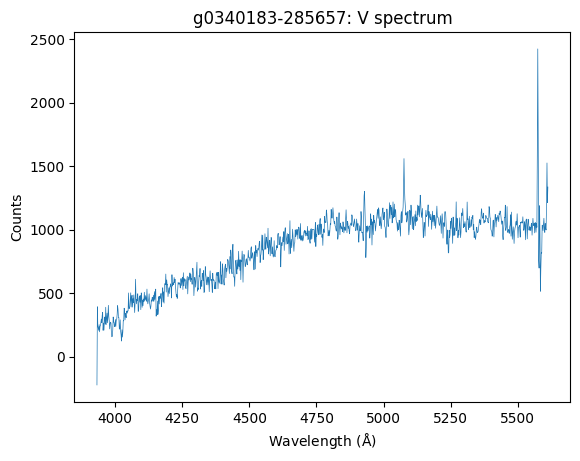

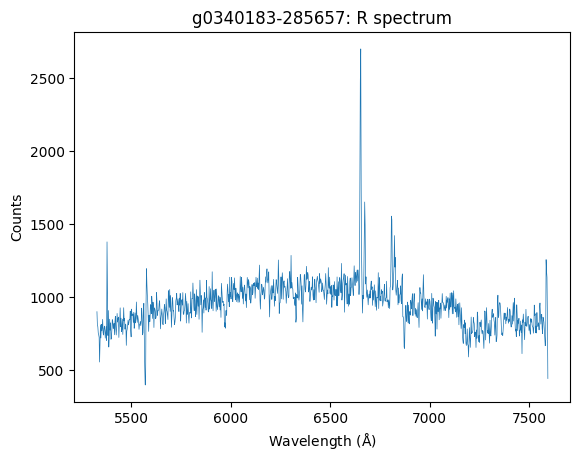

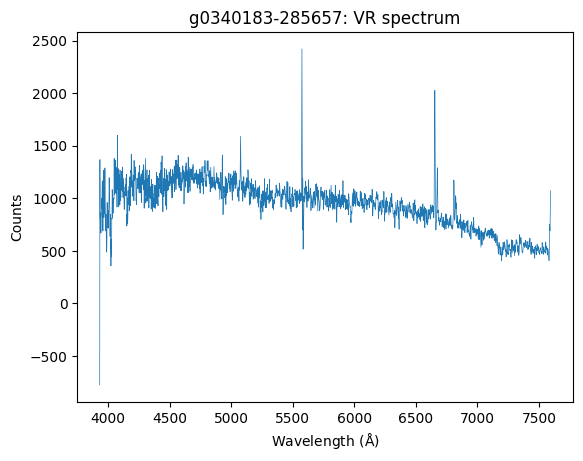

g0340460-290118 https://datacentral.org.au/vo/slink/links?ID=g0340460-290118&DR=6dfgs_fdr&RESPONSEFORMAT=fits


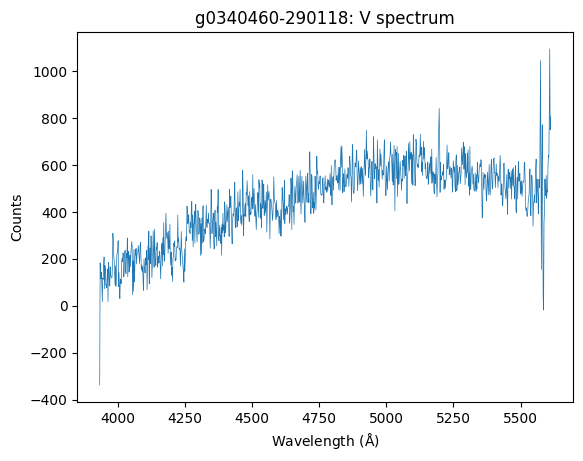

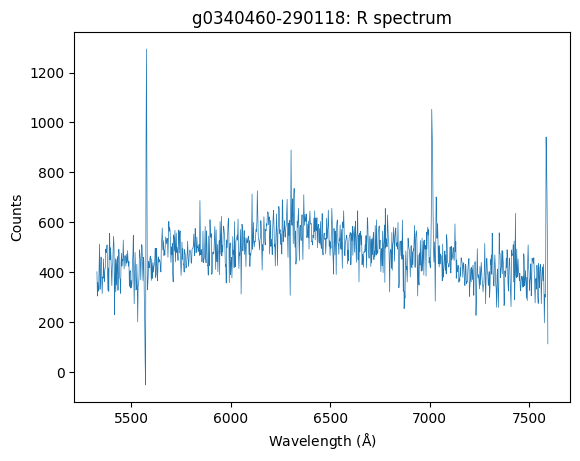

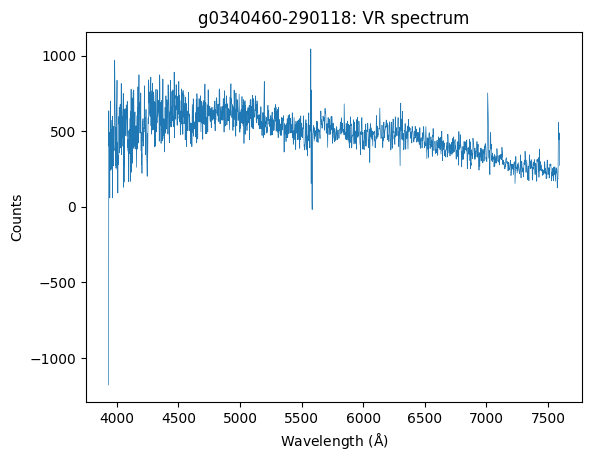

In [17]:
#width of line to use in matplotlib
LWIDTH=0.5

#Go through each of the full (original) spectra
#and plot in a simple way the V, R and VR spectra
for target, u in urls.items():
    print (target,u)
    ofname = "%s.fits" % target
    print ("Downloading ",ofname)
    spec = requests.get(u).content
    #write out the spectrum to a file
    fptr = open(ofname,"wb")
    fptr.write(spec)
    fptr.close()
    #Load in the spectra using specutils and the 6dFGS-combined loader
    slist = SpectrumList.read(BytesIO(spec),format='6dFGS-combined')
    nspec = len(slist)
    for idx in range(0,nspec):
        hdr = slist[idx].meta['header']
        band = re.sub('SPECTRUM ','',hdr['EXTNAME'])
        wave = slist[idx].wavelength
        flux = slist[idx].flux
        plt.plot(wave,flux,linewidth=LWIDTH)
        titre = "%s: %s spectrum" % (target,band)
        plt.title(titre)
        plt.xlabel("Wavelength ($\mathrm{\AA}$)")
        plt.ylabel("Counts")
        plt.show()